Structure:

**Final list needs to look like this:**

week1, sum(top3projects)
week2, sum(top3projects)
week3, sum(top3projects)
week4, sum(top3projects)
week5, sum(top3projects)

**for that I need first this list:**

week1, project 1 (order by sum desc per week)
week1, project 2
week1, project 3
week1, project 4
week1, ...
week1, project n
week2, project 1
week2, project 2
week2, project 3
week2, project 4
...

To identify the top 3 I can use panda dataframe.nlargest():

DataFrame.nlargest(n, columns, keep='first')

**example:
df = pd.DataFrame({'population': [59000000, 65000000, 434000, 434000, 434000, 337000, 11300, 11300, 11300],''GDP': [1937894, 2583560 , 12011, 4520, 12128, 17036, 182, 38, 311], 'alpha-2': ["IT", "FR", "MT", "MV", "BN", "IS", "NR", "TV", "AI"]}, index=["Italy", "France", "Malta", "Maldives", "Brunei", "Iceland", "Nauru", "Tuvalu", "Anguilla"])

df
          population      GDP alpha-2
Italy       59000000  1937894      IT
France      65000000  2583560      FR
Malta         434000    12011      MT
Maldives      434000     4520      MV
Brunei        434000    12128      BN
Iceland       337000    17036      IS
Nauru          11300      182      NR
Tuvalu         11300       38      TV
Anguilla       11300      311      AI

df.nlargest(3, 'population')
        population      GDP alpha-2
France    65000000  2583560      FR
Italy     59000000  1937894      IT
Malta       434000    12011      MT

or if I want to use more than one column to sort:

df.nlargest(3, ['population', 'GDP'])
        population      GDP alpha-2
France    65000000  2583560      FR
Italy     59000000  1937894      IT
Brunei      434000    12128      BN


In [1]:
! pip install pandas
! pip install pyodbc
! pip install sqlalchemy

import pandas as pd
import mysql.connector
import urllib
from sqlalchemy import create_engine

db = mysql.connector.connect(user='bi', password='bp42!BBB', host='127.0.0.1', database='betterplace', port=3307)

In [2]:
sql = '''
SELECT donation_created_at_cw_local as week, receiver_identifier, round(sum(amount_in_cents/100),0) as SV
FROM bi_donation_values
where donation_status = "confirmed"
and donation_created_at_year_local = 2020
and receiver_type = "Project"
group by donation_created_at_cw_local, receiver_identifier
order by week, SV desc;
'''

data = pd.read_sql_query(sql, db)

In [3]:
data

,week,receiver_identifier,SV
0,1,Project#34855,28772.0
1,1,Project#75965,12547.0
2,1,Project#52872,9964.0
3,1,Project#71822,8791.0
4,1,Project#632,4550.0
...,...,...,...
58598,47,Project#54247,2.0
58599,47,Project#86373,2.0
58600,47,Project#62833,1.0
58601,47,Project#71866,1.0


In [4]:
##to convert a panda dataframe to a list:
data_list = data.values.tolist()
print(data_list)

[[1, 'Project#34855', 28772.0], [1, 'Project#75965', 12547.0], [1, 'Project#52872', 9964.0], [1, 'Project#71822', 8791.0], [1, 'Project#632', 4550.0], [1, 'Project#18515', 2892.0], [1, 'Project#76080', 2729.0], [1, 'Project#73816', 2250.0], [1, 'Project#75254', 2177.0], [1, 'Project#14049', 2127.0], [1, 'Project#26821', 2020.0], [1, 'Project#67366', 1978.0], [1, 'Project#76081', 1965.0], [1, 'Project#75632', 1847.0], [1, 'Project#12586', 1619.0], [1, 'Project#74173', 1590.0], [1, 'Project#7252', 1534.0], [1, 'Project#11135', 1453.0], [1, 'Project#61851', 1365.0], [1, 'Project#62833', 1317.0], [1, 'Project#7910', 1296.0], [1, 'Project#47369', 1242.0], [1, 'Project#2287', 1241.0], [1, 'Project#36882', 1220.0], [1, 'Project#56993', 1185.0], [1, 'Project#74488', 1170.0], [1, 'Project#74365', 1100.0], [1, 'Project#26744', 1029.0], [1, 'Project#72285', 1000.0], [1, 'Project#66798', 1000.0], [1, 'Project#75167', 1000.0], [1, 'Project#5512', 1000.0], [1, 'Project#71878', 855.0], [1, 'Project#7

In [20]:
print("Enter the number of projects you want to have considered per week:")
top = input()
print("the top "+TOP+" projects are considered")
print(top)

Enter the number of projects you want to have considered per week:
3
the top 3 projects are considered
3


In [35]:
print("Enter the number of projects you want to have considered per week:")

WEEK = 0 #position of week in entry array
SV = 2 #
TOP = int(input())
week = 1
i = 0
week_sum = {}

for entry in data_list:
    if entry[WEEK] != week:
        week = entry[WEEK]
        i = 0
    if i == TOP:
        continue
    if week in week_sum.keys():
        week_sum[week] += entry[SV]
    else: 
        week_sum[week] = entry[SV] 
    i += 1

print("the top "+str(TOP)+" projects are considered")
print(TOP)
print(week_sum)


Enter the number of projects you want to have considered per week:
3
the top 3 projects are considered
3
{1: 51283.0, 2: 84708.0, 3: 275035.0, 4: 28793.0, 5: 175120.0, 6: 30077.0, 7: 26128.0, 8: 30989.0, 9: 39385.0, 10: 167210.0, 11: 34892.0, 12: 334882.0, 13: 182415.0, 14: 196466.0, 15: 184935.0, 16: 104011.0, 17: 79135.0, 18: 1807850.0, 19: 218365.0, 20: 75584.0, 21: 55673.0, 22: 48095.0, 23: 43651.0, 24: 20578.0, 25: 34295.0, 26: 65230.0, 27: 44662.0, 28: 34710.0, 29: 56818.0, 30: 36290.0, 31: 24964.0, 32: 53927.0, 33: 33680.0, 34: 207660.0, 35: 109813.0, 36: 28164.0, 37: 145451.0, 38: 81701.0, 39: 28425.0, 40: 73723.0, 41: 30304.0, 42: 27863.0, 43: 22871.0, 44: 38738.0, 45: 45838.0, 46: 47717.0, 47: 10925.0}


In [23]:
WEEK = 0 #position of week in entry array
SV = 2 
TOP = 3
week = 1
i = 0
week_sum = {}

for entry in data_list:
    if entry[WEEK] != week:
        week = entry[WEEK]
        i = 0
    if i == TOP:
        continue
    if week in week_sum.keys():
        week_sum[week] += entry[SV]
    else: 
        week_sum[week] = entry[SV] 
    i += 1
print(week_sum)

{1: 51283.0, 2: 84708.0, 3: 275035.0, 4: 28793.0, 5: 175120.0, 6: 30077.0, 7: 26128.0, 8: 30989.0, 9: 39385.0, 10: 167210.0, 11: 34892.0, 12: 334882.0, 13: 182415.0, 14: 196466.0, 15: 184935.0, 16: 104011.0, 17: 79135.0, 18: 1807850.0, 19: 218365.0, 20: 75584.0, 21: 55673.0, 22: 48095.0, 23: 43651.0, 24: 20578.0, 25: 34295.0, 26: 65230.0, 27: 44662.0, 28: 34710.0, 29: 56818.0, 30: 36290.0, 31: 24964.0, 32: 53927.0, 33: 33680.0, 34: 207660.0, 35: 109813.0, 36: 28164.0, 37: 145451.0, 38: 81701.0, 39: 28425.0, 40: 73723.0, 41: 30304.0, 42: 27863.0, 43: 22871.0, 44: 38738.0, 45: 45838.0, 46: 47717.0, 47: 10925.0}


In [7]:
print(week_sum.keys())
type(week_sum.values())


dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])


dict_values

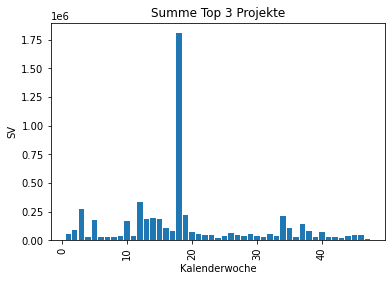

In [8]:
import matplotlib.pyplot as plt
plt.bar(week_sum.keys(), week_sum.values(), align='center')
plt.xticks(rotation = 90)
plt.title("Summe Top 3 Projekte")
plt.xlabel("Kalenderwoche")
plt.ylabel("SV")
plt.show()

In [11]:
print("Enter the number of projects you want to have considered per week:")
TOP = input()
print("the top "+TOP+" projects are considered")

Enter the number of projects you want to have considered per week:
3
the top 3 projects are considered
